# Requirements

In [271]:
# !pip install tensorflow keras

In [272]:
import pandas as pd
from pandas.conftest import axis_1

In [273]:
# Add as many imports as you need.

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for Bitcoin. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- symbol - the resource for prediction
- open - the open price of BTC
- high - the high price of BTC
- low - the low price of BTC
- volumeBTC - the volume of trades BTC
- volumeUSD - the volume of trades USD
- close - the close price of BTC

Target:
close

Load the dataset into a `pandas` data frame.

In [274]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("./BTC-Daily.csv")


Explore the dataset using visualizations of your choice.

In [275]:
# Write your code here. Add as many boxes as you need.
df

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,3/1/2022 0:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,2/28/2022 0:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,2/27/2022 0:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,2/26/2022 0:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,2/25/2022 0:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...
2646,12/2/2014 0:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,12/1/2014 0:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,11/30/2014 0:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,11/29/2014 0:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [276]:
numerical_features = df.select_dtypes(include=["number"])
print(list(numerical_features))

['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD']


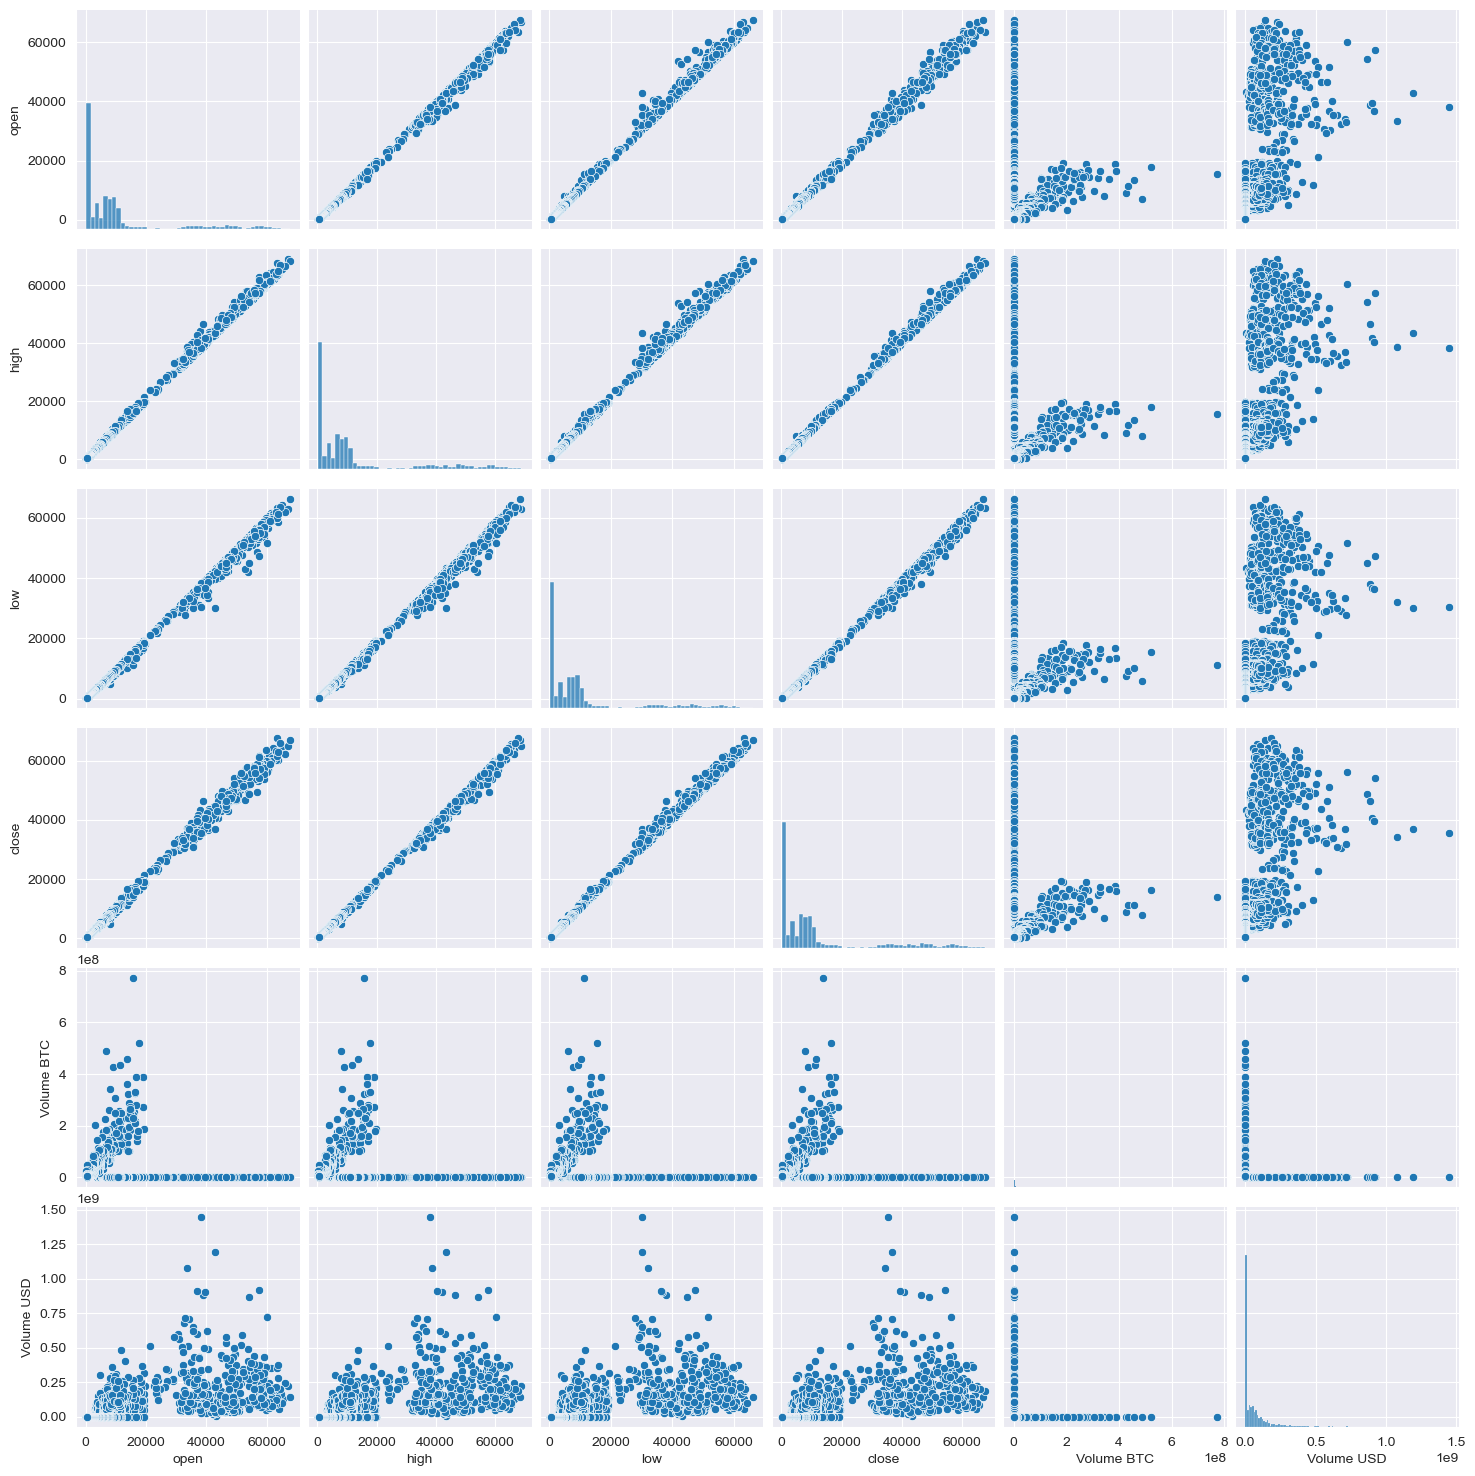

In [277]:
import seaborn as sns
sns.pairplot(df)

In [278]:
df["symbol"].unique()

array(['BTC/USD'], dtype=object)

In [279]:
df.drop(columns=["symbol"],axis=1,inplace=True)

In [280]:
df[list(numerical_features)].corr()


,open,high,low,close,Volume BTC,Volume USD
open,1.000000,0.999485,0.998983,0.998798,-0.048598,0.609992
high,0.999485,1.000000,0.998901,0.999474,-0.045371,0.617662
low,0.998983,0.998901,1.000000,0.999319,-0.056040,0.593531
close,0.998798,0.999474,0.999319,1.000000,-0.049489,0.608673
Volume BTC,-0.048598,-0.045371,-0.056040,-0.049489,1.000000,-0.160242
Volume USD,0.609992,0.617662,0.593531,0.608673,-0.160242,1.000000


# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [281]:
df.isnull().sum()

date          0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [282]:
df.head(3)

,date,open,high,low,close,Volume BTC,Volume USD
0,3/1/2022 0:00,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,2/28/2022 0:00,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,2/27/2022 0:00,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07


In [283]:
df["date"]

0         3/1/2022 0:00
1        2/28/2022 0:00
2        2/27/2022 0:00
3        2/26/2022 0:00
4        2/25/2022 0:00
             ...       
2646     12/2/2014 0:00
2647     12/1/2014 0:00
2648    11/30/2014 0:00
2649    11/29/2014 0:00
2650    11/28/2014 0:00
Name: date, Length: 2651, dtype: object

In [284]:
df["date"] = pd.to_datetime(df["date"])
# df['Stamp'] = pd.to_datetime(df['Stamp'], utc=True)

In [285]:
df.head(3)

,date,open,high,low,close,Volume BTC,Volume USD
0,2022-03-01,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,2022-02-28,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,2022-02-27,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07


In [286]:
df.set_index(keys=["date"], inplace=True)

In [287]:
df.head(3)

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2022-03-01,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
2022-02-28,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2022-02-27,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07


In [288]:
df.sort_index(inplace=True)

In [289]:
df

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2014-11-28,363.59,381.34,360.57,376.28,3.220878e+06,8.617150e+03
2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03
2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
...,...,...,...,...,...,...
2022-02-25,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
2022-02-26,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
2022-02-27,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07


In [290]:
# Write your code here. Add as many boxes as you need.
df_close = df[["close"]].copy()

In [291]:
def shift_columns(df:pd.DataFrame,columns:list[str],n:int):
    df_copy = df.copy(deep=True)
    for column in columns:
        for i in range(1, n+1):
            df_copy[f'{column}_shifted_{i}'] = df_copy[column].shift(i)
    return df_copy

In [292]:
df_close

,close
date,
2014-11-28,376.28
2014-11-29,376.72
2014-11-30,373.34
2014-12-01,378.39
2014-12-02,379.25
...,...
2022-02-25,39231.64
2022-02-26,39146.66
2022-02-27,37712.68


In [293]:
df_close["close"]

date
2014-11-28      376.28
2014-11-29      376.72
2014-11-30      373.34
2014-12-01      378.39
2014-12-02      379.25
                ...   
2022-02-25    39231.64
2022-02-26    39146.66
2022-02-27    37712.68
2022-02-28    43178.98
2022-03-01    43185.48
Name: close, Length: 2651, dtype: float64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [294]:
df_close = shift_columns(df_close,["close"],7)

In [295]:
df_close

,close,close_shifted_1,close_shifted_2,close_shifted_3,close_shifted_4,close_shifted_5,close_shifted_6,close_shifted_7
date,,,,,,,,
2014-11-28,376.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-29,376.72,376.28,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-30,373.34,376.72,376.28,NaN,NaN,NaN,NaN,NaN
2014-12-01,378.39,373.34,376.72,376.28,NaN,NaN,NaN,NaN
2014-12-02,379.25,378.39,373.34,376.72,376.28,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-02-25,39231.64,38376.88,37274.18,38269.94,37076.60,38373.90,40109.02,39996.99
2022-02-26,39146.66,39231.64,38376.88,37274.18,38269.94,37076.60,38373.90,40109.02
2022-02-27,37712.68,39146.66,39231.64,38376.88,37274.18,38269.94,37076.60,38373.90


In [296]:
df_close.dropna(axis=0,inplace=True)

In [297]:
df_close

,close,close_shifted_1,close_shifted_2,close_shifted_3,close_shifted_4,close_shifted_5,close_shifted_6,close_shifted_7
date,,,,,,,,
2014-12-05,374.95,365.20,376.67,379.25,378.39,373.34,376.72,376.28
2014-12-06,375.07,374.95,365.20,376.67,379.25,378.39,373.34,376.72
2014-12-07,376.87,375.07,374.95,365.20,376.67,379.25,378.39,373.34
2014-12-08,364.61,376.87,375.07,374.95,365.20,376.67,379.25,378.39
2014-12-09,350.49,364.61,376.87,375.07,374.95,365.20,376.67,379.25
...,...,...,...,...,...,...,...,...
2022-02-25,39231.64,38376.88,37274.18,38269.94,37076.60,38373.90,40109.02,39996.99
2022-02-26,39146.66,39231.64,38376.88,37274.18,38269.94,37076.60,38373.90,40109.02
2022-02-27,37712.68,39146.66,39231.64,38376.88,37274.18,38269.94,37076.60,38373.90


In [298]:
# Write your code here. Add as many boxes as you need.
X,y = df_close.drop(columns=["close"],axis=1),df_close["close"]

In [299]:

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)

In [300]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

## Neural Networks

Create an LSTM model and train it using the `train` function.

In [301]:
# Write your code here. Add as many boxes as you need.

train_X.shape[0]

2115

In [302]:
lag=7

In [303]:
train_X.shape[1]

7

In [304]:
(train_X.shape[0], lag, 1) # (samples, timesteps, features)


(2115, 7, 1)

In [305]:
train_X = train_X.reshape(train_X.shape[0], lag, 1)
test_X = test_X.reshape(test_X.shape[0], lag, 1)

In [306]:
from keras.layers import LSTM, Dense
from keras import Sequential, Input

model = Sequential([
    Input((lag, (train_X.shape[1] // lag))), # (timesteps, features)
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

In [307]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 7, 64)             16896     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [308]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [309]:
history = model.fit(train_X, train_y, validation_split=0.2, epochs=64, batch_size=8)

Epoch 1/64
212/212 [==============================] - 1s 2ms/step - loss: 10504674.0000 - mean_squared_error: 10504674.0000 - val_loss: 365108.5625 - val_mean_squared_error: 365108.5625
Epoch 2/64
212/212 [==============================] - 0s 2ms/step - loss: 1074343.5000 - mean_squared_error: 1074343.5000 - val_loss: 368816.4688 - val_mean_squared_error: 368816.4688
Epoch 3/64
212/212 [==============================] - 0s 2ms/step - loss: 935579.5625 - mean_squared_error: 935579.5625 - val_loss: 313041.2500 - val_mean_squared_error: 313041.2500
Epoch 4/64
212/212 [==============================] - 0s 2ms/step - loss: 894325.6875 - mean_squared_error: 894325.6875 - val_loss: 1412061.3750 - val_mean_squared_error: 1412061.3750
Epoch 5/64
212/212 [==============================] - 0s 2ms/step - loss: 963674.6875 - mean_squared_error: 963674.6875 - val_loss: 1106310.0000 - val_mean_squared_error: 1106310.0000
Epoch 6/64
212/212 [==============================] - 0s 2ms/step - loss: 736414

<Axes: >

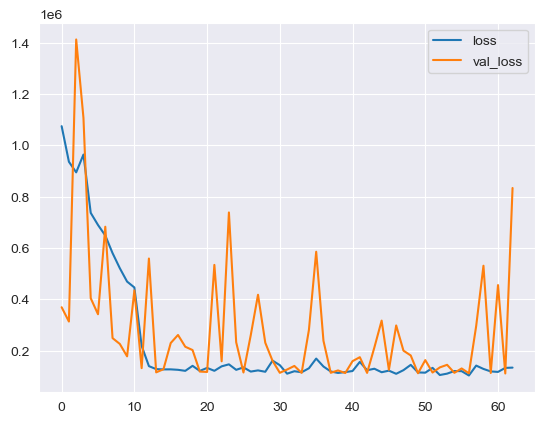

In [310]:
sns.lineplot(history.history['loss'][1:], label='loss')
sns.lineplot(history.history['val_loss'][1:], label='val_loss')

Use the trained model to make predictions for the test set.

In [311]:

pred_y = model.predict(test_X)

17/17 [==============================] - 0s 1ms/step


In [312]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [313]:
from sklearn.metrics import r2_score

# Write your code here. Add as many boxes as you need.
r2_score(test_y, pred_y)


0.9217963317913477

# Additional Bonus Task

Group the data by month. You can use [pandas.Grouper](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html) function.

Create an LSTM model to predict the 'close' price on a montly frequency.

In [314]:
df_close

,close,close_shifted_1,close_shifted_2,close_shifted_3,close_shifted_4,close_shifted_5,close_shifted_6,close_shifted_7
date,,,,,,,,
2014-12-05,374.95,365.20,376.67,379.25,378.39,373.34,376.72,376.28
2014-12-06,375.07,374.95,365.20,376.67,379.25,378.39,373.34,376.72
2014-12-07,376.87,375.07,374.95,365.20,376.67,379.25,378.39,373.34
2014-12-08,364.61,376.87,375.07,374.95,365.20,376.67,379.25,378.39
2014-12-09,350.49,364.61,376.87,375.07,374.95,365.20,376.67,379.25
...,...,...,...,...,...,...,...,...
2022-02-25,39231.64,38376.88,37274.18,38269.94,37076.60,38373.90,40109.02,39996.99
2022-02-26,39146.66,39231.64,38376.88,37274.18,38269.94,37076.60,38373.90,40109.02
2022-02-27,37712.68,39146.66,39231.64,38376.88,37274.18,38269.94,37076.60,38373.90


In [315]:
df_close = df_close.reset_index()

In [316]:
df_close

,date,close,close_shifted_1,close_shifted_2,close_shifted_3,close_shifted_4,close_shifted_5,close_shifted_6,close_shifted_7
0,2014-12-05,374.95,365.20,376.67,379.25,378.39,373.34,376.72,376.28
1,2014-12-06,375.07,374.95,365.20,376.67,379.25,378.39,373.34,376.72
2,2014-12-07,376.87,375.07,374.95,365.20,376.67,379.25,378.39,373.34
3,2014-12-08,364.61,376.87,375.07,374.95,365.20,376.67,379.25,378.39
4,2014-12-09,350.49,364.61,376.87,375.07,374.95,365.20,376.67,379.25
...,...,...,...,...,...,...,...,...,...
2639,2022-02-25,39231.64,38376.88,37274.18,38269.94,37076.60,38373.90,40109.02,39996.99
2640,2022-02-26,39146.66,39231.64,38376.88,37274.18,38269.94,37076.60,38373.90,40109.02
2641,2022-02-27,37712.68,39146.66,39231.64,38376.88,37274.18,38269.94,37076.60,38373.90
2642,2022-02-28,43178.98,37712.68,39146.66,39231.64,38376.88,37274.18,38269.94,37076.60


In [317]:
df_grouped_close = df_close.groupby(pd.Grouper(key="date", freq="1M")).mean()

,close,close_shifted_1,close_shifted_2,close_shifted_3,close_shifted_4,close_shifted_5,close_shifted_6,close_shifted_7
date,,,,,,,,
2014-12-31,336.915185,338.617037,341.014444,343.402222,345.689630,347.817407,349.515185,351.622222
2015-01-31,247.703871,250.970645,253.530000,256.111613,258.706129,260.412581,262.392581,264.531290
2015-02-28,234.278214,233.028214,232.297500,232.227857,232.163571,232.995714,234.087857,234.673929
2015-03-31,268.596774,268.887097,269.060323,268.883226,268.421613,268.150645,267.810645,267.455806
2015-04-30,234.833333,235.107667,235.847667,236.417000,237.293667,238.247000,239.019667,239.573667
...,...,...,...,...,...,...,...,...
2021-11-30,60705.494000,60851.671333,60987.910667,61153.345333,61347.282000,61503.167000,61547.769667,61744.982000
2021-12-31,49328.349032,49675.437742,50020.418710,50370.586129,50603.855806,50702.928065,50967.409677,51184.920645
2022-01-31,41111.849677,41360.960968,41658.021935,41925.464194,42241.430000,42677.228387,43127.611935,43562.009032


In [318]:
df_close.set_index(keys=["date"], inplace=True)


In [320]:
df_close

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 7, 64)             16896     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________
